# Анализ оттока клиентов банка

In [ ]:
"""
CustomerId — идентификатор клиента
Surname — фамилия клиента
CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
Geography — страна клиента (банк международный)
Gender — пол клиента
Age — возраст клиента
Tenure — сколько лет клиент пользуется услугами банка
Balance — баланс на счетах клиента в банке
NumOfProducts — количество услуг банка, которые приобрёл клиент
HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
EstimatedSalary — предполагаемая заработная плата клиента
Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)
"""

In [155]:

import pandas as pd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('default')
import seaborn as sns

churn_data = pd.read_csv('data/churn.csv')
churn_data = churn_data.drop(['RowNumber'], axis=1)
churn_data['Exited'] = churn_data['Exited'].apply(lambda num: "Churn" if num == 1 else "Loyal") 
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].apply(lambda num: "Active" if num == 1 else "Inactive") 

display(churn_data.head())
display(churn_data.describe())

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,Active,101348.88,Churn
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,Active,112542.58,Loyal
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,Inactive,113931.57,Churn
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,Inactive,93826.63,Loyal
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,Active,79084.10,Loyal


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,100090.239881
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,57510.492818
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,11.580000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,51002.110000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,100193.915000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,149388.247500
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,199992.480000


''

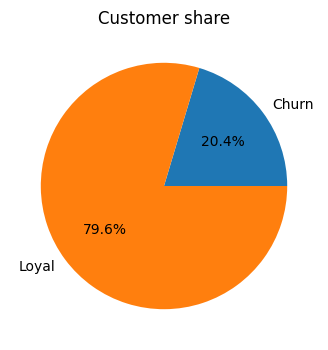

In [2]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

cu_num = churn_data.groupby('Exited')['CustomerId'].count()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4))

axes.pie(
    cu_num,
    labels = cu_num.index,
    autopct='%.1f%%'
)
axes.set_title("Customer share")
;

In [ ]:
"""
Сразу замечу, что задание построено некорректно в смысле названий. Дальше будет видно, что у "ушедших" есть деньги на счетах.
Единственный разумный вариант - это клиенты, проскоренные моделью оттока и склонные к оттоку. Поэтому я переназвал их в таблице Churn.
20% клиентов банка, склонных к оттоку, - это печальное состояние клиентской базы, есть шанс потерять пятую часть прибыли в обозримом горизонте.
Надо детальнее разобраться с этими клиентами, чтобы понять, кто они, есть ли какой-то паттерн, может, есть что-то, что их объединят.
И дальше, конечно, нужны данные по конкретным продуктам, которыми они пользовались, без этого картина будет очень урезанной.
"""

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

''

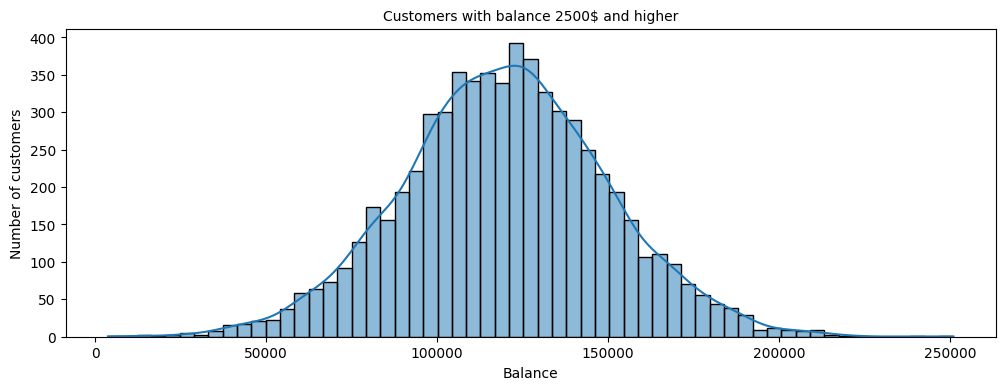

In [3]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2500$. 
# Опишите распределение и сделайте выводы.

cu_balance = churn_data[churn_data['Balance'] > 2500]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

display(cu_balance['Balance'].describe())

sns.histplot(
    data=cu_balance,
    x='Balance',
    kde=True
)
axes.set_title('Customers with balance 2500$ and higher', fontsize=10)
axes.set_ylabel('Number of customers')
;

In [ ]:
"""
В базе 6383 клиента, у которых на счету больше 2500$ (это 2/3 от всех). Минимальный баланс у таких клиентов 3768$, максимальный баланс 250 898$.
Почти все клиенты попадают в диапазон от 50 000$ до 200 000$, большинство находится в группе от 100 000$ до 150 000$.
Средний баланс средств на счету этих клиентов около 120 000$. Дальше надо разбираться со склонными к оттоку и лояльными.
"""

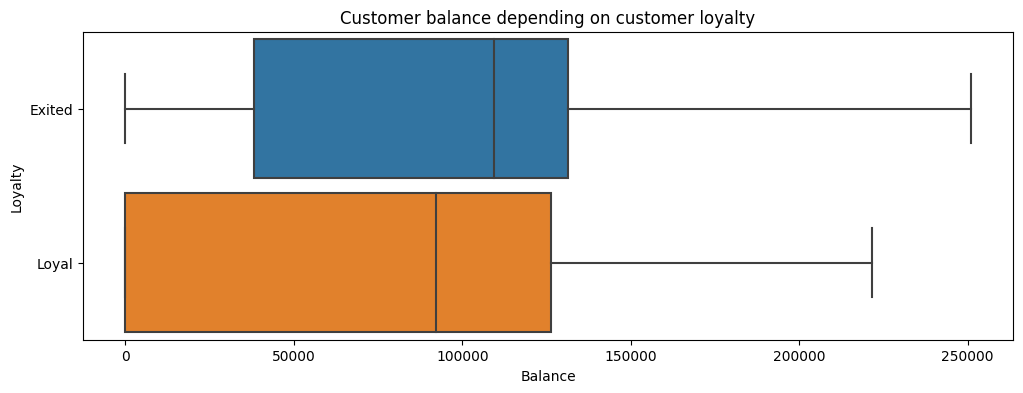

In [301]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)

boxplot.set_title('Customer balance depending on customer loyalty');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Loyalty');

In [ ]:
"""
Как я и говорил вначале, у "ушедших" клиентов есть деньги на балансе, поэтому они не ушедшие, а склонные к оттоку.
У склонных к оттоку разброс в количестве денег на счетах больше, но в основном это отдельные выбросы.
Большая часть счетов содержит от 40 до 130 тысяч долларов. В то время как среди лояльных достаточно много клиентов с нулевыми счетами.
Средний остаток на балансе у отточников тоже выше - около 110 тысяч, в то время как у лояльных - около 90 тысяч.
Видно, что склонные к оттоку - более премиальный сегмент, и тем опаснее будет их потерять.
"""

''

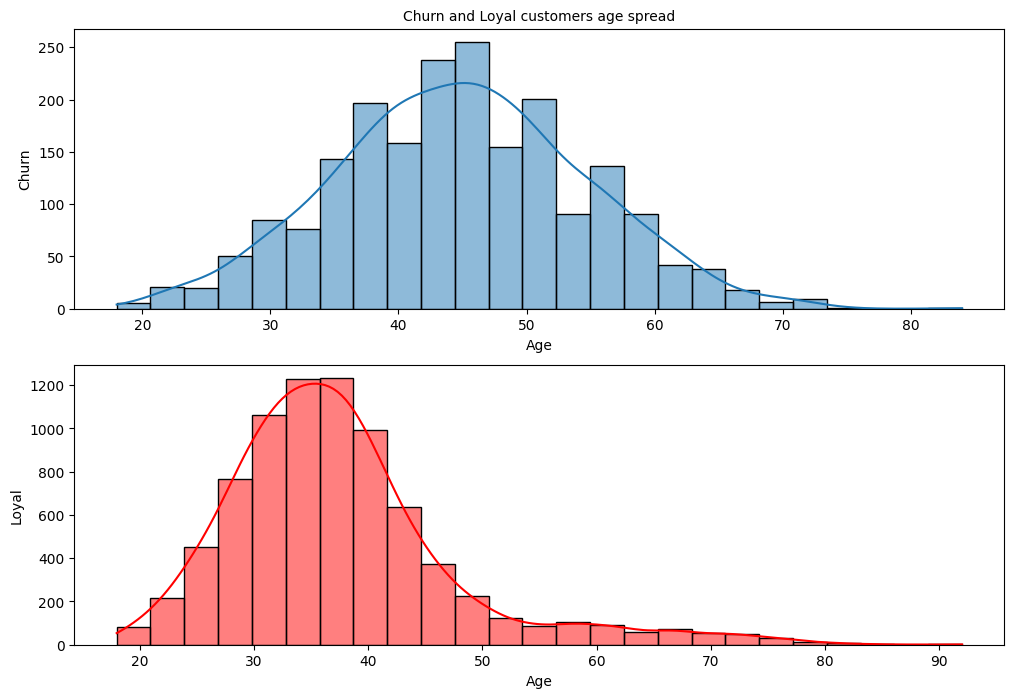

In [354]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

sns.histplot(
    data=churn_data[churn_data["Exited"] == 'Churn'],
    x='Age',
    bins=25, 
    kde=True, 
    ax=axes[0]
)
axes[0].set_title('Churn and Loyal customers age spread', fontsize=10)
axes[0].set_ylabel('Churn')

sns.histplot(
    data=churn_data[churn_data["Exited"] == 'Loyal'],
    x='Age',
    bins=25,
    kde=True,
    color='red',
    ax=axes[1]
)
axes[1].set_ylabel('Loyal')
;

In [ ]:
"""
В группе отточников преобладают клиенты более старшего возраста (средний возраст 45 лет). Среди лояльных клиентов средний возраст 35 лет. 
Как правило, более взрослые клиента банка более состоятельные, что еще раз подтверждает гипотезу о том, что под угрозой оттока премиальный сегмент.
"""

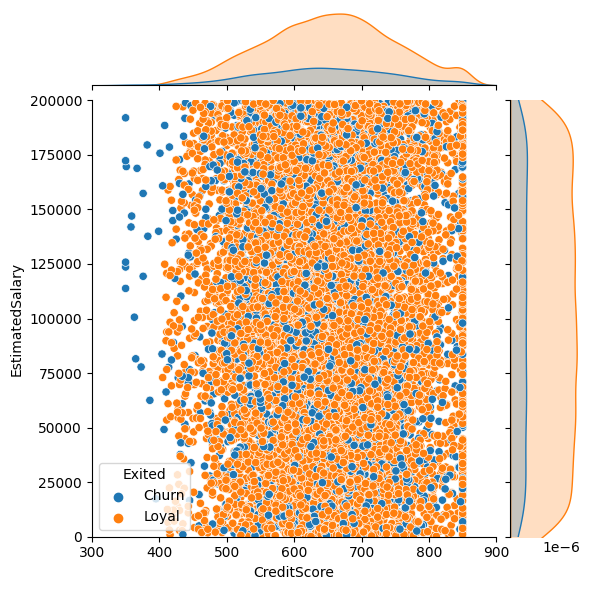

In [17]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 900),
    ylim = (0, 200000),
    height=6,
)

In [ ]:
"""
Никакой взаимосвязи между предполагаемой зарплатой и кредитным рейтингом нет, как у лояльных, так и у отточников.
"""

''

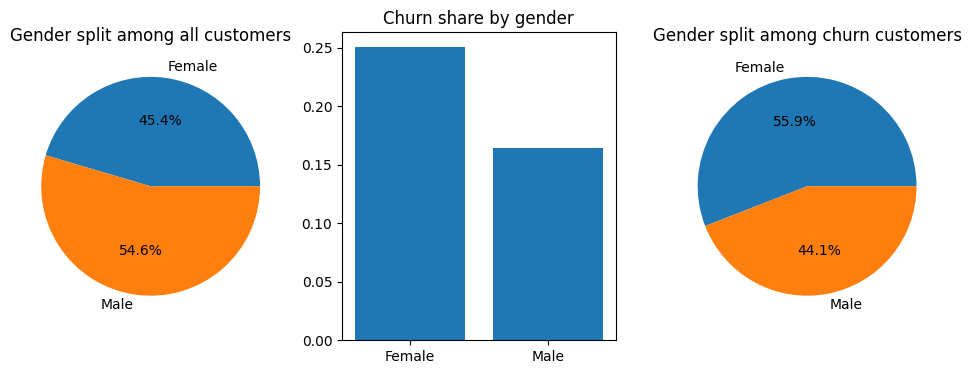

In [58]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

data=churn_data.groupby('Gender')['CustomerId'].count()
data2=churn_data[churn_data["Exited"] == 'Churn'].groupby('Gender')['CustomerId'].count()
data3 = data2/data

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

axes[0].pie(
    data,
    labels=data.index, 
    autopct='%.1f%%'
)
axes[0].set_title('Gender split among all customers')

axes[1].bar(x = data3.index, height = data3)
axes[1].set_title('Churn share by gender')

axes[2].pie(
    data2,
    labels=data2.index, 
    autopct='%.1f%%'
)
axes[2].set_title('Gender split among churn customers')
;


In [ ]:
"""
В целом среди клиентов выше доля мужчин (54,6%), но доля оттока выше среди женской аудитории (25% против 15% среди мужской).
Из-за этого среди отточников преобладают женщины (55,9%).
"""

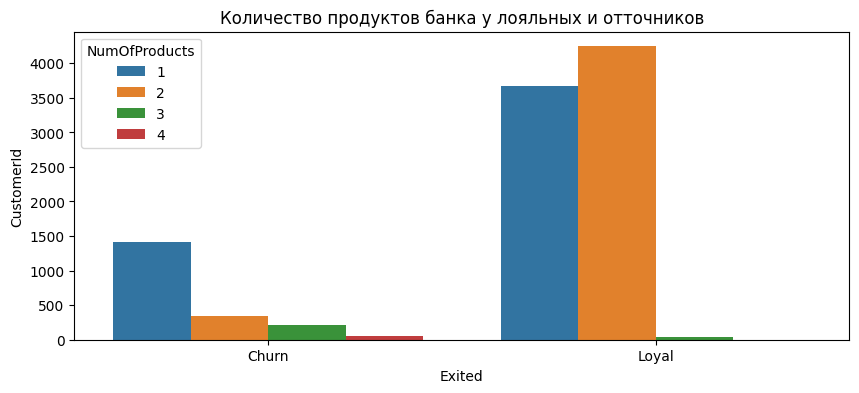

In [102]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

fig = plt.figure(figsize=(10, 4))
num_products=churn_data.groupby(['Exited','NumOfProducts'], as_index=False)['CustomerId'].count()

barplot = sns.barplot(
    data=num_products,
    x='Exited',
    y='CustomerId',
    hue='NumOfProducts'
)
barplot.set_title('Количество продуктов банка у лояльных и отточников');

In [ ]:
"""
Из графика видно, что большинство лояльных клиентов банка имееют два продукта, в то время как подавляющее большинство отточников только один.
Вот здесь надо было бы анализировать тип продуктов. Например, если у клиента открыт депозит, до его истечения он не может попасть в отток.
Аналогично с кредитом (в отличие от кредитной карты). И по результатам этого анализа можно было бы запустить маркетинговую кампанию 
по удержанию клиентов, предлагая им, например, депозит с повышенной ставкой.
"""

''

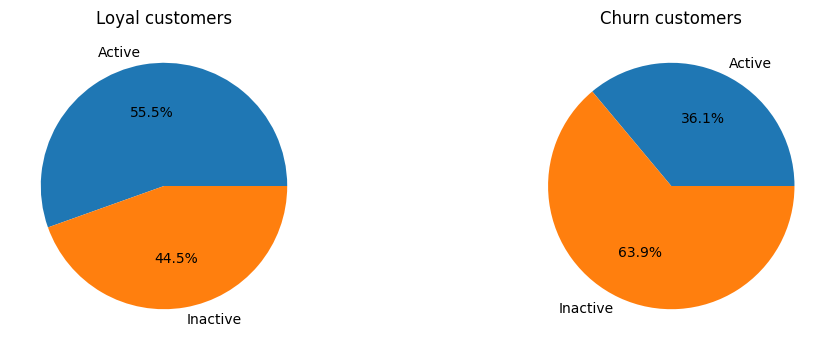

In [114]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

data=churn_data[churn_data["Exited"] == 'Loyal'].groupby('IsActiveMember')['CustomerId'].count()
data2=churn_data[churn_data["Exited"] == 'Churn'].groupby('IsActiveMember')['CustomerId'].count()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].pie(
    data,
    labels=data.index, 
    autopct='%.1f%%'
)
axes[0].set_title('Loyal customers')


axes[1].pie(
    data2,
    labels=data2.index, 
    autopct='%.1f%%'
)
axes[1].set_title('Churn customers')
;

In [ ]:
"""
Что такое активный клиент?? Ну как можно делать задание, не имея таких вводных? =(
Пусть в данном контексте активным будет клиент, который совершает покупки с помощью банковской карты.
Из графика видно, что среди лояльных клиентов активных больше, чем среди отточников (55,5% против 36,1%).
Банк может предложить неактивным клиентам, например, повышенный кэшбэк на любимые категории покупок.
"""

In [139]:
# 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. 
# Предположите, с чем это может быть связано.

country = churn_data.groupby('Geography')['CustomerId'].count()
country2 = churn_data[churn_data['Exited']=='Churn'].groupby('Geography')['CustomerId'].count()
country3 = country2 / country*100

fig = px.choropleth(
    data_frame=country3, 
    locations=country3.index, 
    locationmode = "country names", 
    color="CustomerId", 
    range_color=[0, 50],
    title='Churn share by country', 
    width=800, 
    height=500, 
    color_continuous_scale='Reds'
)
fig.show()

In [ ]:
"""
Доля отточников выше в Германии в два раза, чем в Испании и Франции, где они практически одинаковые.
Возможно, в Германии более развитая банковская система, и у нашего банка много конкурентов, которые предлагают более выгодные условия обслуживания,
например, меньший процент по кредиту, больший кэшбэк по дебетовой карте, дольше беспроцентная рассрочка по кредитке и тд.
"""

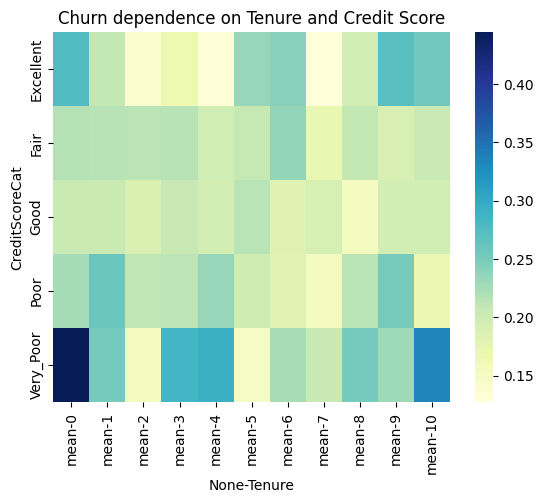

In [169]:
# 9.10. Переведите числовой признак CreditScore в категориальный. 
# Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat) 

# Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
# а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
# В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
# Hа основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

#churn_data['Exited'] = churn_data['Exited'].apply(lambda num: 1 if num == "Churn" else 0) 

pivot = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc=['mean'],
    fill_value=0
)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu') 
heatmap.set_title('Churn dependence on Tenure and Credit Score', fontsize=12);


In [ ]:
"""
Понятно, что чаще всего уходят те, у кого низкий кредитный рейтинг и кто пользовался услугами банка меньше года.
Это максимально нелояльные клиенты (срок жизни клиента - это и есть лояльность!), а также максимально опасные для банка,
так как они могут не выплатить кредит. Думаю, что срок их жизни минимален, потому что они заводят дебетовый счет, но кредит,
за которым они пришли, банк не одобряет. Так что, счет они в итоге закрывают или просто им не пользуются.
Следующая, склонная к оттоку, группа клиентов - это клиенты с низким кредитным рейтингом и долгим сроком жизни.
Предполагаю, что у них в банке открыт долгосрочный кредит, но они постоянно просрочивают платежи - отсюда низкий рейтинг.
После окончания истории с кредитом они сразу уходят. Опять же, малопривлекательный сегмент.
Далее рассматривать клиентов с низким кредитным рейтингом не интересно, они все слишком рисковые для банка.
По настоящему интересно узнать причины оттока среди клиентов с идеальным кредитным рейтингом, особенно тех, 
кто пользуется услугами банка много лет. Здесь нужно проводить детальную фокус группу, чтобы докопаться до причин. 
"""

In [ ]:
"""
Резюме по исследованию:
1) Аналитика выявила интересные сегменты, но дальше нужно разговаривать о конкретных причинах с представителями этих сегментов
2) Необходимо дальше исследовать конкретные продукты, которыми пользуются клиенты банка, чтобы запустить маркетинговую кампанию на отточников
"""